In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt

df = pd.read_csv('loan_data.csv')

np.random.seed(42)
indices_to_replace = np.random.choice(len(df), size=666, replace=False)
df.loc[indices_to_replace, 'previous_loan_defaults_on_file'] = np.nan
np.random.seed(41)
indices_to_replace = np.random.choice(len(df), size=576, replace=False)
df.loc[indices_to_replace, 'person_education'] = np.nan
rows_to_duplicate = []
for idx in range(2, 15):
    row = df.loc[idx].copy()
    rows_to_duplicate.append(row)
duplicates_df = pd.DataFrame(rows_to_duplicate)
df = pd.concat([df, duplicates_df], ignore_index=False)

print(f"\nРазмер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов")
display(df.head(6))


Размер датасета: 45013 строк, 14 столбцов


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,NaN,1
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1


In [ ]:
print("Типы данных:")
print(df.dtypes)

Типы данных:
person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object


In [ ]:
df = df.replace('?', np.nan)
print("Количество пропущенных значений по столбцам:")
print(df.isnull().sum())
print("\nПроцент пропущенных значений:")
print((df.isnull().sum() / len(df)) * 100)

Количество пропущенных значений по столбцам:
person_age                          0
person_gender                       0
person_education                  576
person_income                       0
person_emp_exp                      0
person_home_ownership               0
loan_amnt                           0
loan_intent                         0
loan_int_rate                       0
loan_percent_income                 0
cb_person_cred_hist_length          0
credit_score                        0
previous_loan_defaults_on_file    667
loan_status                         0
dtype: int64

Процент пропущенных значений:
person_age                        0.000000
person_gender                     0.000000
person_education                  1.279630
person_income                     0.000000
person_emp_exp                    0.000000
person_home_ownership             0.000000
loan_amnt                         0.000000
loan_intent                       0.000000
loan_int_rate                     0

In [ ]:
df = df.dropna()
print("Пропуски после удаления:")
print(df.isnull().sum())

Пропуски после удаления:
person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


In [ ]:
print(f'Исходное количество строк: {len(df)}')
df = df.drop_duplicates()
print(f"Количество строк после удаления дубликатов: {len(df)}")

Исходное количество строк: 43779
Количество строк после удаления дубликатов: 43767


/tmp/ipython-input-1978466805.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='loan_status', palette='viridis')


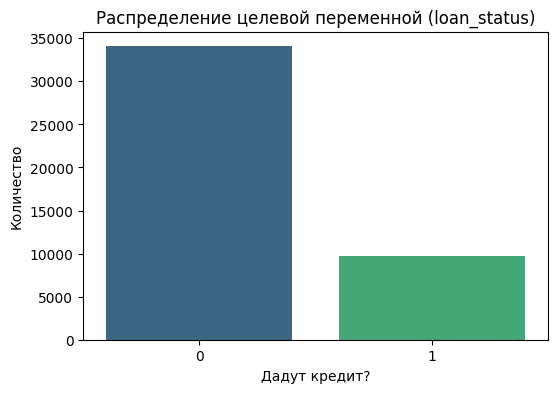

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='loan_status', palette='viridis')
plt.title('Распределение целевой переменной (loan_status)')
plt.xlabel('Дадут кредит?')
plt.ylabel('Количество')
plt.show()

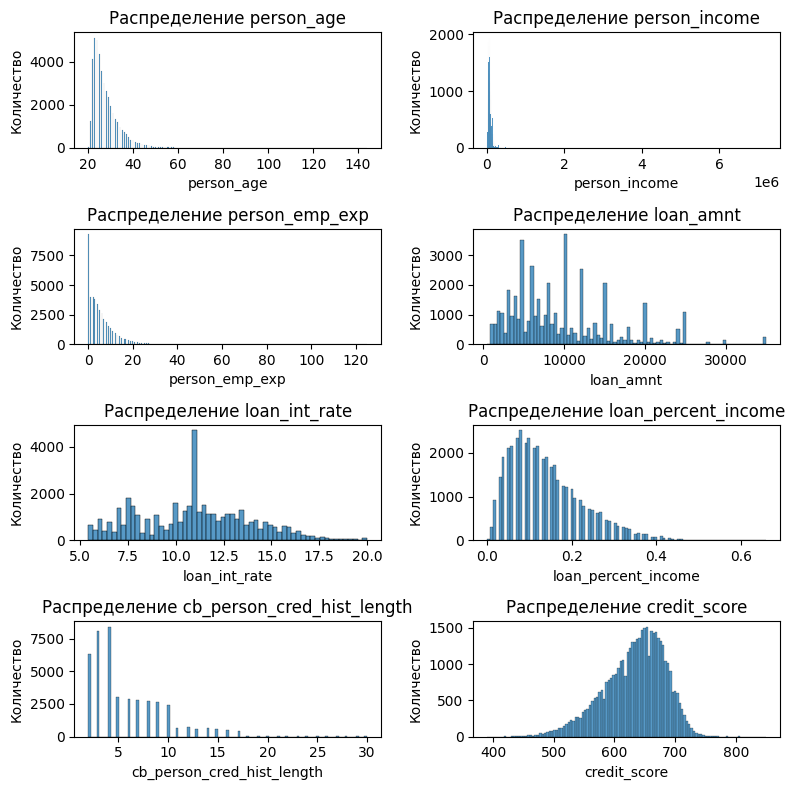

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns.drop('loan_status')
plt.figure(figsize=(8, 8))
for i, col in enumerate(numeric_cols):
  plt.subplot(4, 2, i+1)
  sns.histplot(df, x=df[col])
  plt.title(f'Распределение {col}')
  plt.xlabel(col)
  plt.ylabel('Количество')
plt.tight_layout()
plt.show()


/tmp/ipython-input-3178474447.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_data, y=col, order=top_categories, ax=axes[i], palette='viridis')
/tmp/ipython-input-3178474447.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_data, y=col, order=top_categories, ax=axes[i], palette='viridis')
/tmp/ipython-input-3178474447.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_data, y=col, order=top_categories, ax=axes[i], palette='viridis')
/tmp/ipython-input-3178474447.py:8: FutureWarning: 

Pa

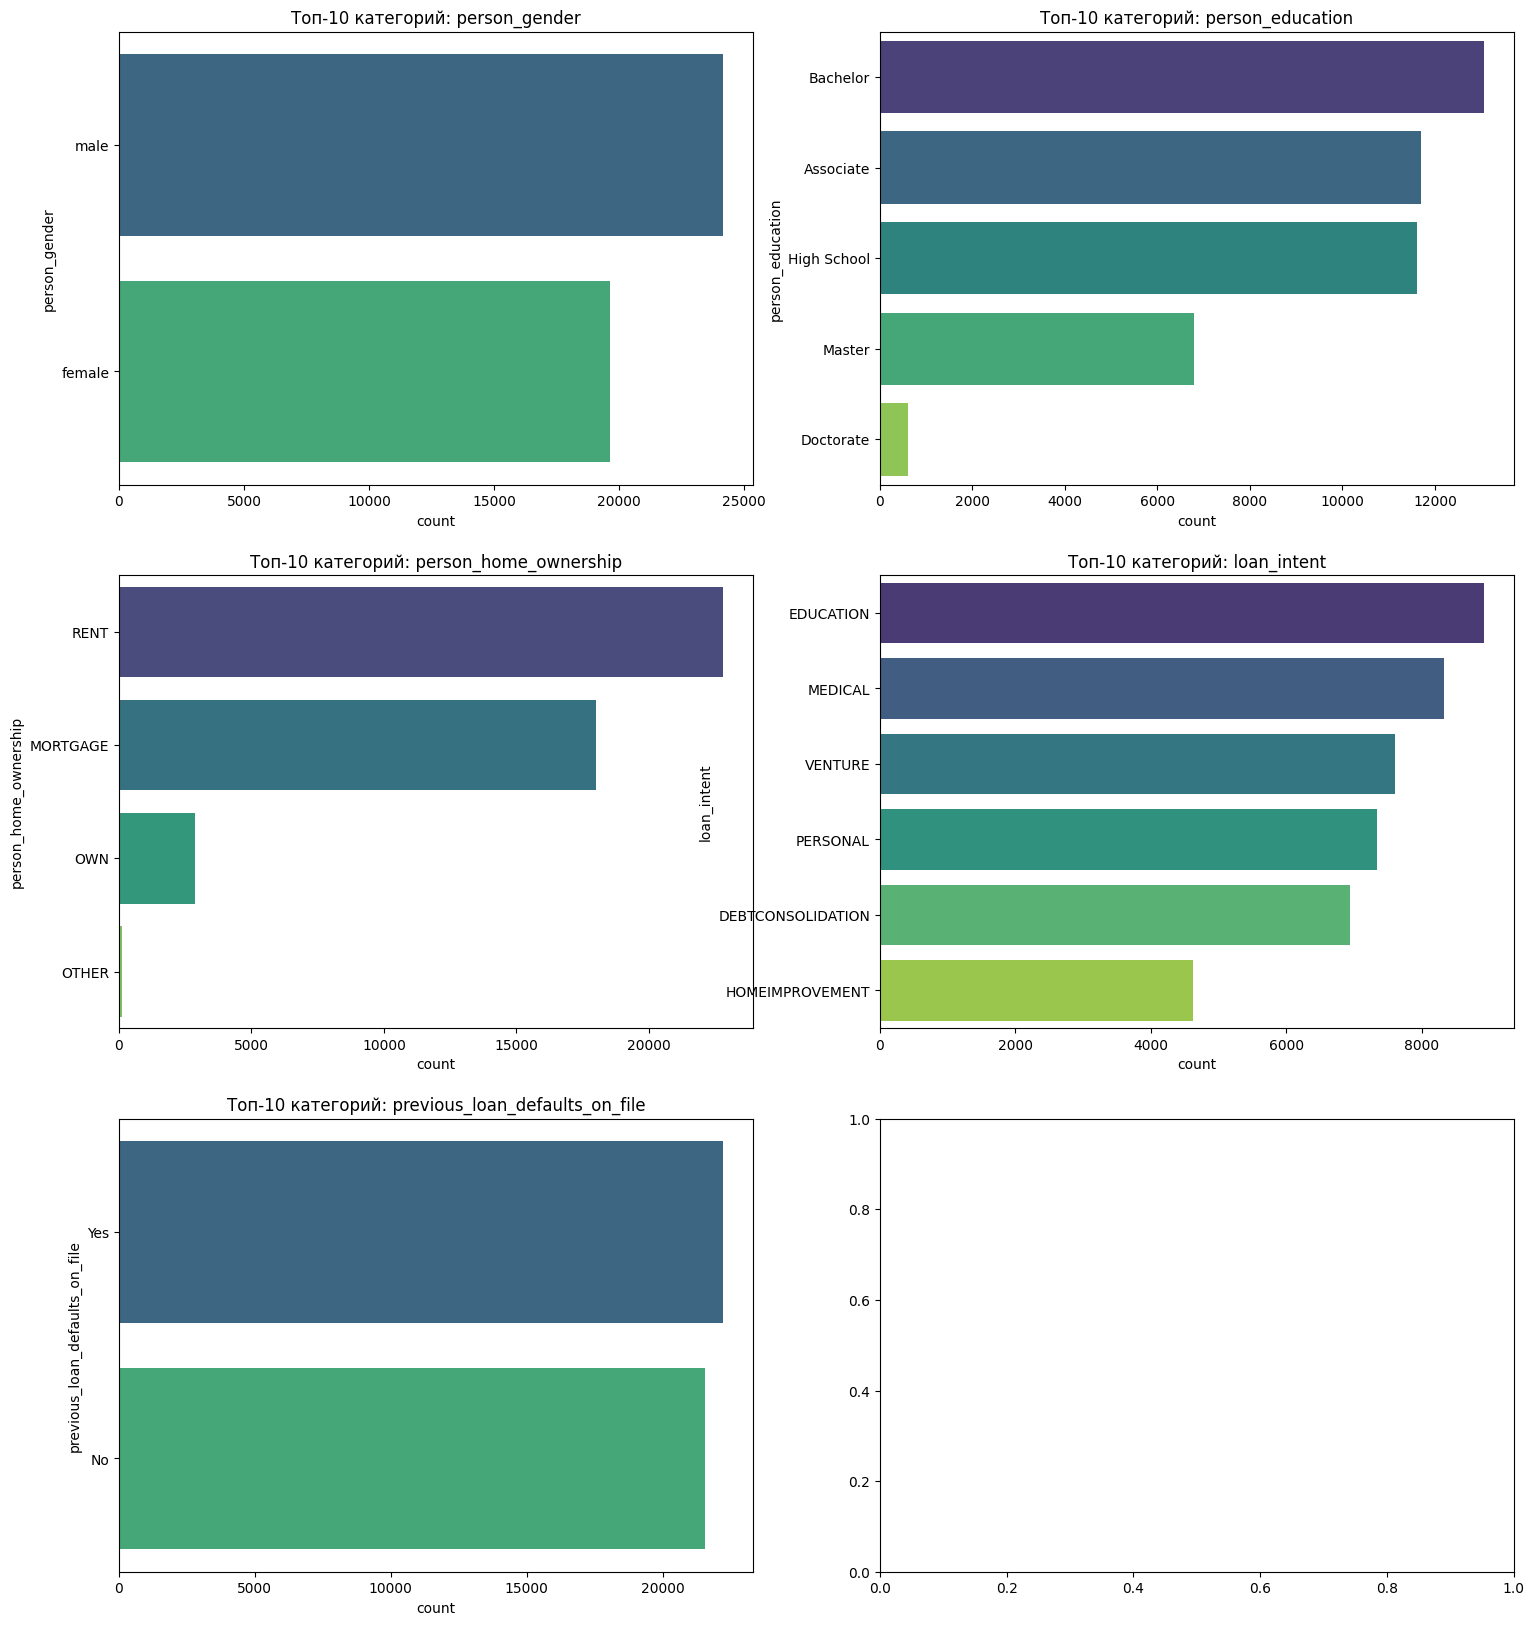

In [ ]:
categorical_cols = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
fig, axes = plt.subplots(3, 2, figsize=(18, 20))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    top_categories = df[col].value_counts().head(10).index
    filtered_data = df[df[col].isin(top_categories)]
    sns.countplot(data=filtered_data, y=col, order=top_categories, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Топ-10 категорий: {col}')


In [ ]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

print("\nТипы данных после кодирования:")
print(df_encoded.dtypes)
print("\nПервые 5 строк закодированного датасета:")
display(df_encoded.head())



Типы данных после кодирования:
person_age                        float64
person_gender                       int64
person_education                    int64
person_income                     float64
person_emp_exp                      int64
person_home_ownership               int64
loan_amnt                         float64
loan_intent                         int64
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file      int64
loan_status                         int64
dtype: object

Первые 5 строк закодированного датасета:


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
5,21.0,0,3,12951.0,0,2,2500.0,5,7.14,0.19,2.0,532,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_cols = df_encoded.select_dtypes(include=['number']).columns.drop('loan_status')
print("Числовые признаки для масштабирования:", *numeric_cols)
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])
print("Числовые признаки после масштабирования (первые 5 строк):")
display(df_encoded[numeric_cols].head())


Числовые признаки для масштабирования: person_age person_gender person_education person_income person_emp_exp person_home_ownership loan_amnt loan_intent loan_int_rate loan_percent_income cb_person_cred_hist_length credit_score previous_loan_defaults_on_file
Числовые признаки после масштабирования (первые 5 строк):


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,-0.954043,-1.109384,1.525797,-0.103647,-0.892105,0.905173,4.022521,0.852785,1.683295,4.012482,-0.739493,-1.419361,-1.014847
1,-1.119724,-1.109384,0.849712,-0.838896,-0.892105,0.210971,-1.359432,-0.883046,0.045899,-0.685545,-0.997755,-2.548645,0.985370
2,-0.457000,-1.109384,0.849712,-0.836973,-0.396762,-1.177432,-0.647115,0.274175,0.626370,3.439552,-0.739493,0.046726,-1.014847
3,-0.788362,-1.109384,-0.502456,-0.007468,-0.892105,0.905173,4.022521,0.274175,1.418225,3.439552,-0.997755,0.839206,-1.014847
5,-1.119724,-1.109384,0.849712,-0.830652,-0.892105,0.210971,-1.121993,1.431395,-1.296229,0.574902,-0.997755,-1.993909,-1.014847


In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['loan_status'])
y = df_encoded['loan_status']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Размер обучающей выборки: {X_train.shape[0]} строк")
print(f"Размер тестовой выборки: {X_test.shape[0]} строк")
print(f"Доля класса 1 в train: {y_train.mean():.3f}")
print(f"Доля класса 1 в test: {y_test.mean():.3f}")

Размер обучающей выборки: 35013 строк
Размер тестовой выборки: 8754 строк
Доля класса 1 в train: 0.222
Доля класса 1 в test: 0.222


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)

models = {'Gini': dt_gini, 'Entropy': dt_entropy}
results = {}

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    train_time = time.time() - start_time
    acc = accuracy_score(y_test, y_pred)
    results[name] = {'model': model, 'accuracy': acc, 'train_time': train_time}

    print(f"--- Дерево решений ({name}) ---")
    print(f"Точность (Accuracy): {acc:.4f}")
    print(f"Время обучения: {train_time:.4f} сек")
    print(f"Отчет классификации:\n{classification_report(y_test, y_pred, target_names=['0', '1'])}")


--- Дерево решений (Gini) ---
Точность (Accuracy): 0.8965
Время обучения: 0.2362 сек
Отчет классификации:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      6812
           1       0.77      0.76      0.76      1942

    accuracy                           0.90      8754
   macro avg       0.85      0.85      0.85      8754
weighted avg       0.90      0.90      0.90      8754

--- Дерево решений (Entropy) ---
Точность (Accuracy): 0.8988
Время обучения: 0.2702 сек
Отчет классификации:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      6812
           1       0.78      0.76      0.77      1942

    accuracy                           0.90      8754
   macro avg       0.86      0.85      0.85      8754
weighted avg       0.90      0.90      0.90      8754



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
dt_base = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=dt_base,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)
print("Запуск GridSearchCV...")
grid_search.fit(X_train, y_train)
best_dt = grid_search.best_estimator_
print("\n=== Лучшие гиперпараметры ===")
print(grid_search.best_params_)
y_pred_best = best_dt.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)
best_f1 = classification_report(y_test, y_pred_best, output_dict=True)['macro avg']['f1-score']
print(f"\n=== Лучшая модель (после GridSearchCV) ===")
print(f"Точность (Accuracy): {best_accuracy:.4f}")
print(f"Макро-F1: {best_f1:.4f}")
print(f"Время обучения: {grid_search.refit_time_:.4f} сек")


Запуск GridSearchCV...
Fitting 5 folds for each of 90 candidates, totalling 450 fits

=== Лучшие гиперпараметры ===
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}

=== Лучшая модель (после GridSearchCV) ===
Точность (Accuracy): 0.9174
Макро-F1: 0.8721
Время обучения: 0.1045 сек


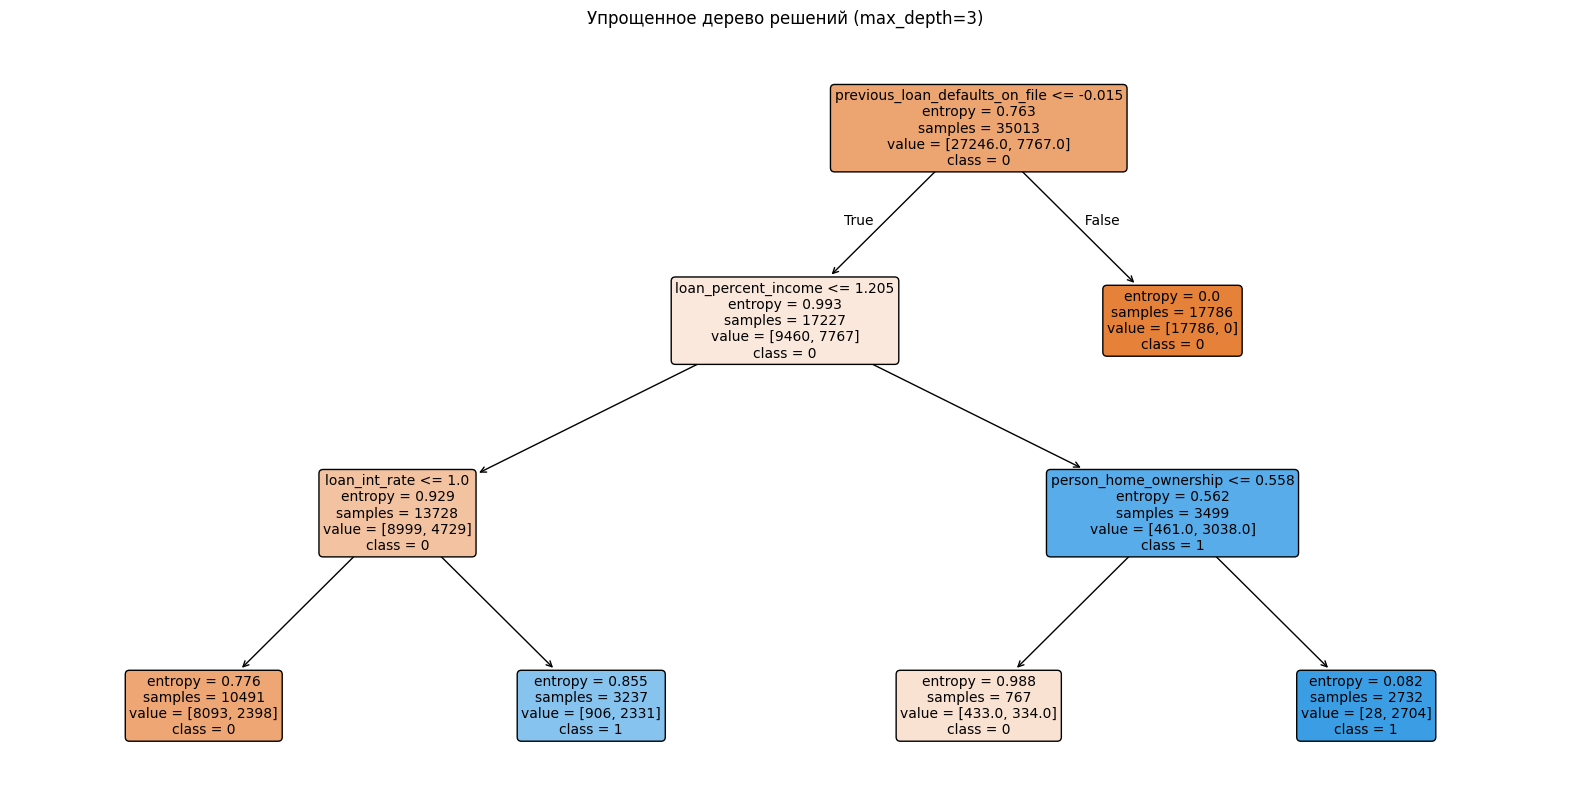

In [ ]:
from sklearn.tree import plot_tree, export_text
import matplotlib.pyplot as plt

dt_visual = DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=42)
dt_visual.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(dt_visual,
          feature_names=X_train.columns,
          class_names=['0', '1'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Упрощенное дерево решений (max_depth=3)")
plt.show()


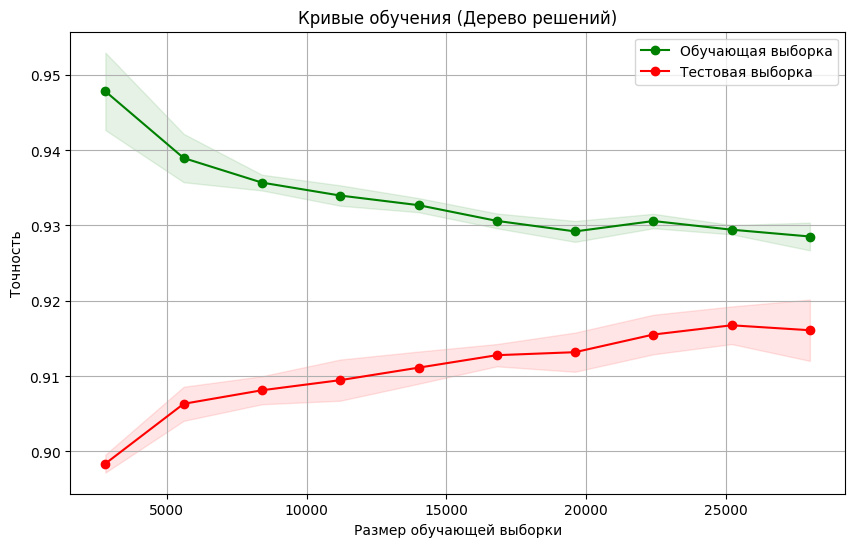

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    best_dt, X_train, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='green', label='Обучающая выборка')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='green')
plt.plot(train_sizes, val_mean, 'o-', color='red', label='Тестовая выборка')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')

plt.title('Кривые обучения (Дерево решений)')
plt.xlabel('Размер обучающей выборки')
plt.ylabel('Точность')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_base = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

start_time = time.time()
rf_base.fit(X_train, y_train)
train_time_base = time.time() - start_time

y_pred_rf_base = rf_base.predict(X_test)
acc_rf_base = accuracy_score(y_test, y_pred_rf_base)
f1_rf_base = classification_report(y_test, y_pred_rf_base, output_dict=True)['macro avg']['f1-score']

print("### Базовый случайный лес (100 деревьев) ###")
print(f"Точность (Accuracy): {acc_rf_base:.4f}")
print(f"Макро-F1: {f1_rf_base:.4f}")
print(f"Время обучения: {train_time_base:.4f} сек")


### Базовый случайный лес (100 деревьев) ###
Точность (Accuracy): 0.9278
Макро-F1: 0.8885
Время обучения: 6.9353 сек


In [ ]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}
rf_base_model = RandomForestClassifier(random_state=42, n_jobs=-1)

grid_search_rf = GridSearchCV(
    estimator=rf_base_model,
    param_grid=param_grid_rf,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

print("Запуск GridSearchCV для Random Forest...")
start_time = time.time()
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_
refit_time = time.time() - start_time
print("\n-=- Лучшие гиперпараметры для Random Forest -=-")
print(grid_search_rf.best_params_)

y_pred_best_rf = best_rf.predict(X_test)
acc_best_rf = accuracy_score(y_test, y_pred_best_rf)
f1_best_rf = classification_report(y_test, y_pred_best_rf, output_dict=True)['macro avg']['f1-score']

print(f"\n=-= Лучшая модель Random Forest =-=")
print(f"Точность (Accuracy): {acc_best_rf:.4f}")
print(f"Макро-F1: {f1_best_rf:.4f}")
print(f"Время обучения (с подбором): {refit_time:.4f} сек")


Запуск GridSearchCV для Random Forest...
Fitting 3 folds for each of 96 candidates, totalling 288 fits

-=- Лучшие гиперпараметры для Random Forest -=-
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

=-= Лучшая модель Random Forest =-=
Точность (Accuracy): 0.9287
Макро-F1: 0.8906
Время обучения (с подбором): 619.6409 сек


In [ ]:
comparison_df = pd.DataFrame({
    'Модель': ['Дерево решений (оптимизированное)', 'Случайный лес (оптимизированный)'],
    'Accuracy': [best_accuracy, acc_best_rf],
    'F1-score (macro)': [best_f1, f1_best_rf],
    'Время обучения (сек)': [grid_search.refit_time_, refit_time],
    'Время предсказания (сек)': [
        time.time() - start_time if 'start_time' in locals() else 0.0,
        time.time() - start_time if 'start_time' in locals() else 0.0
    ]
})

start_time = time.time()
y_pred_dt = best_dt.predict(X_test)
time_dt_pred = time.time() - start_time

start_time = time.time()
y_pred_rf = best_rf.predict(X_test)
time_rf_pred = time.time() - start_time
comparison_df['Время предсказания (сек)'] = [time_dt_pred, time_rf_pred]

comparison_df = comparison_df.round(4)
print("=== Сравнение моделей ===")
print(comparison_df.to_string(index=False))

=== Сравнение моделей ===
                           Модель  Accuracy  F1-score (macro)  Время обучения (сек)  Время предсказания (сек)
Дерево решений (оптимизированное)    0.9174            0.8721                0.1045                    0.0041
 Случайный лес (оптимизированный)    0.9287            0.8906              619.6409                    0.3042


/tmp/ipython-input-544733725.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(5), x='importance', y='feature', palette='viridis')


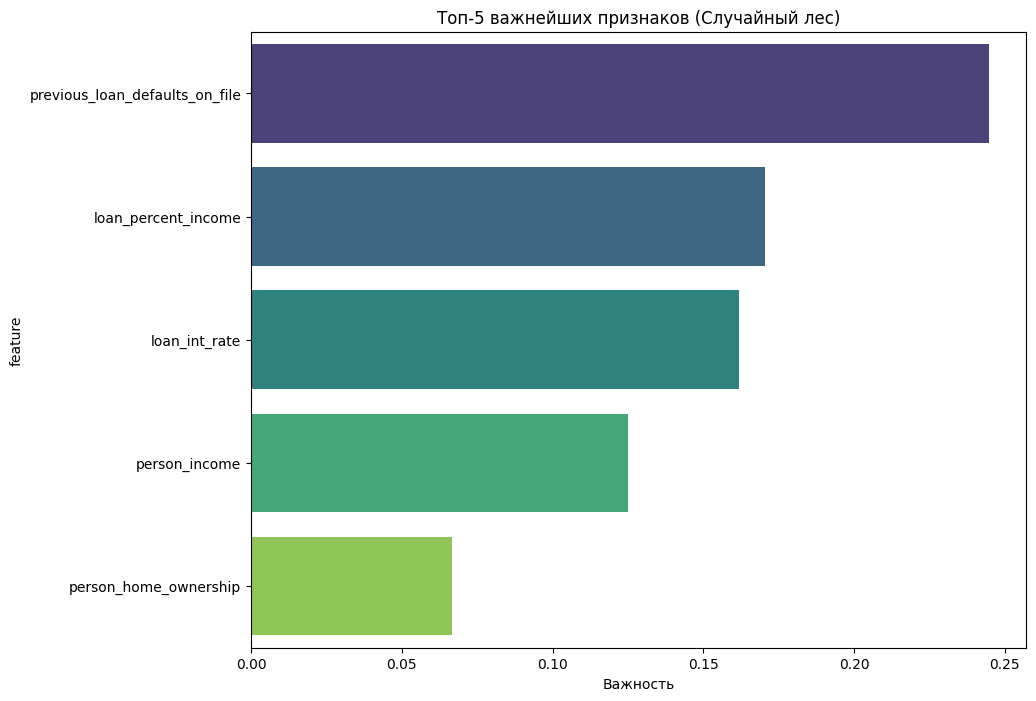

In [ ]:
feature_importances = best_rf.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
importance_df = importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=importance_df.head(5), x='importance', y='feature', palette='viridis')
plt.title('Топ-5 важнейших признаков (Случайный лес)')
plt.xlabel('Важность')
plt.show()

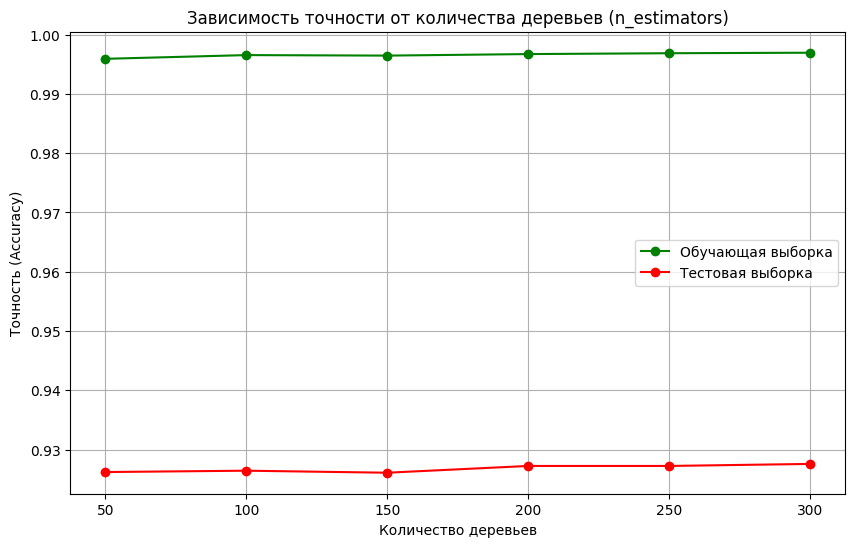

In [ ]:
n_estimators_list = [50, 100, 150, 200, 250, 300]
train_scores = []
test_scores = []
for n_est in n_estimators_list:
    rf_temp = RandomForestClassifier(n_estimators=n_est, max_depth=20, min_samples_split=2,
                                     min_samples_leaf=1, max_features='sqrt', random_state=42, n_jobs=-1)
    rf_temp.fit(X_train, y_train)
    train_pred = rf_temp.predict(X_train)
    test_pred = rf_temp.predict(X_test)
    train_scores.append(accuracy_score(y_train, train_pred))
    test_scores.append(accuracy_score(y_test, test_pred))
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, train_scores, 'o-', label='Обучающая выборка', color='green')
plt.plot(n_estimators_list, test_scores, 'o-', label='Тестовая выборка', color='red')
plt.title('Зависимость точности от количества деревьев (n_estimators)')
plt.xlabel('Количество деревьев')
plt.ylabel('Точность (Accuracy)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

xgb_base = XGBClassifier(
    random_state=42,
    n_jobs=-1,
    use_label_encoder=False,
    eval_metric='logloss'
)

start_time = time.time()
xgb_base.fit(X_train, y_train)
train_time_base = time.time() - start_time

y_pred_xgb_base = xgb_base.predict(X_test)
acc_xgb_base = accuracy_score(y_test, y_pred_xgb_base)
f1_xgb_base = classification_report(y_test, y_pred_xgb_base, output_dict=True)['macro avg']['f1-score']

print("----- Базовый XGBoost -----")
print(f"Точность (Accuracy): {acc_xgb_base:.4f}")
print(f"Макро-F1: {f1_xgb_base:.4f}")
print(f"Время обучения: {train_time_base:.4f} сек")


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:37:02] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


----- Базовый XGBoost -----
Точность (Accuracy): 0.9313
Макро-F1: 0.8963
Время обучения: 0.7341 сек


In [ ]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 0.1, 1]
}
xgb_model = XGBClassifier(
    random_state=42,
    n_jobs=-1,
    use_label_encoder=False,
    eval_metric='logloss'
)
print("Запуск GridSearchCV для XGBoost...")
start_time = time.time()
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)
grid_search_xgb.fit(X_train, y_train)
best_xgb = grid_search_xgb.best_estimator_
refit_time = time.time() - start_time

print("\n=== Лучшие гиперпараметры XGBoost ===")
print(grid_search_xgb.best_params_)

y_pred_best_xgb = best_xgb.predict(X_test)
acc_best_xgb = accuracy_score(y_test, y_pred_best_xgb)
f1_best_xgb = classification_report(y_test, y_pred_best_xgb, output_dict=True)['macro avg']['f1-score']

print(f"\n=== Лучшая модель XGBoost ===")
print(f"Точность (Accuracy): {acc_best_xgb:.4f}")
print(f"Макро-F1: {f1_best_xgb:.4f}")
print(f"Время обучения (с подбором): {refit_time:.4f} сек")

Запуск GridSearchCV для XGBoost...
Fitting 3 folds for each of 972 candidates, totalling 2916 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:59:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== Лучшие гиперпараметры XGBoost ===
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'reg_alpha': 0.1, 'reg_lambda': 0, 'subsample': 1.0}

=== Лучшая модель XGBoost ===
Точность (Accuracy): 0.9345
Макро-F1: 0.9005
Время обучения (с подбором): 1220.8016 сек


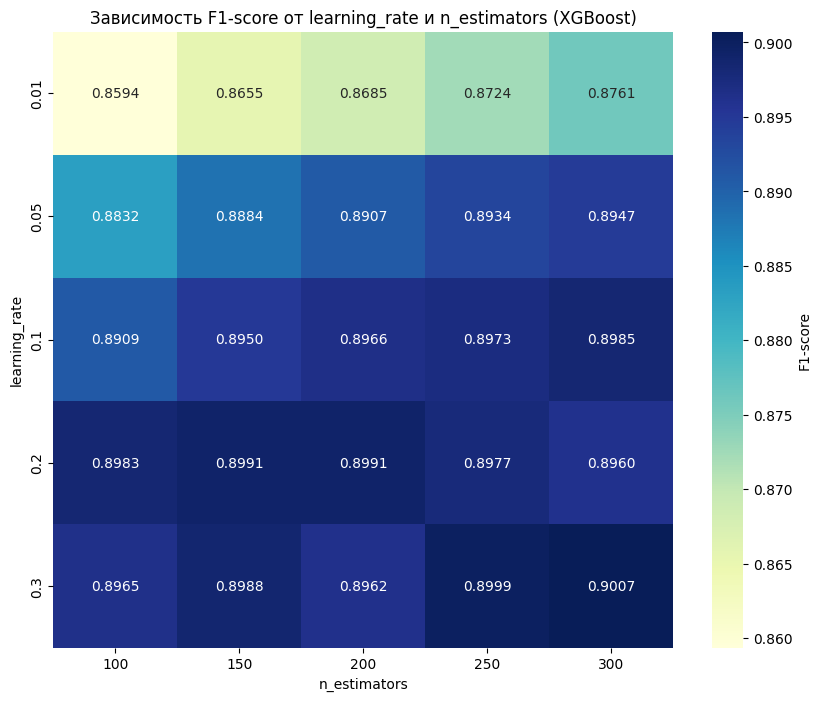

In [ ]:
lr_values = [0.01, 0.05, 0.1, 0.2, 0.3]
n_est_values = [100, 150, 200, 250, 300]

results = []

for lr in lr_values:
    for n_est in n_est_values:
        xgb_temp = XGBClassifier(
            n_estimators=n_est,
            learning_rate=lr,
            max_depth=5,
            subsample=0.8,
            colsample_bytree=1.0,
            reg_alpha=0,
            reg_lambda=1,
            random_state=42,
            n_jobs=-1,
            eval_metric='logloss'
        )
        xgb_temp.fit(X_train, y_train)
        y_pred_temp = xgb_temp.predict(X_test)
        f1_val = classification_report(y_test, y_pred_temp, output_dict=True)['macro avg']['f1-score']
        results.append({'learning_rate': lr, 'n_estimators': n_est, 'f1_score': f1_val})

df_heatmap = pd.DataFrame(results)

pivot_table = df_heatmap.pivot(index="learning_rate", columns="n_estimators", values="f1_score")

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt='.4f', cmap='YlGnBu', cbar_kws={'label': 'F1-score'})
plt.title('Зависимость F1-score от learning_rate и n_estimators (XGBoost)')
plt.xlabel('n_estimators')
plt.ylabel('learning_rate')
plt.show()

/tmp/ipython-input-898494760.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df_xgb.head(5), x='importance', y='feature', palette='viridis')


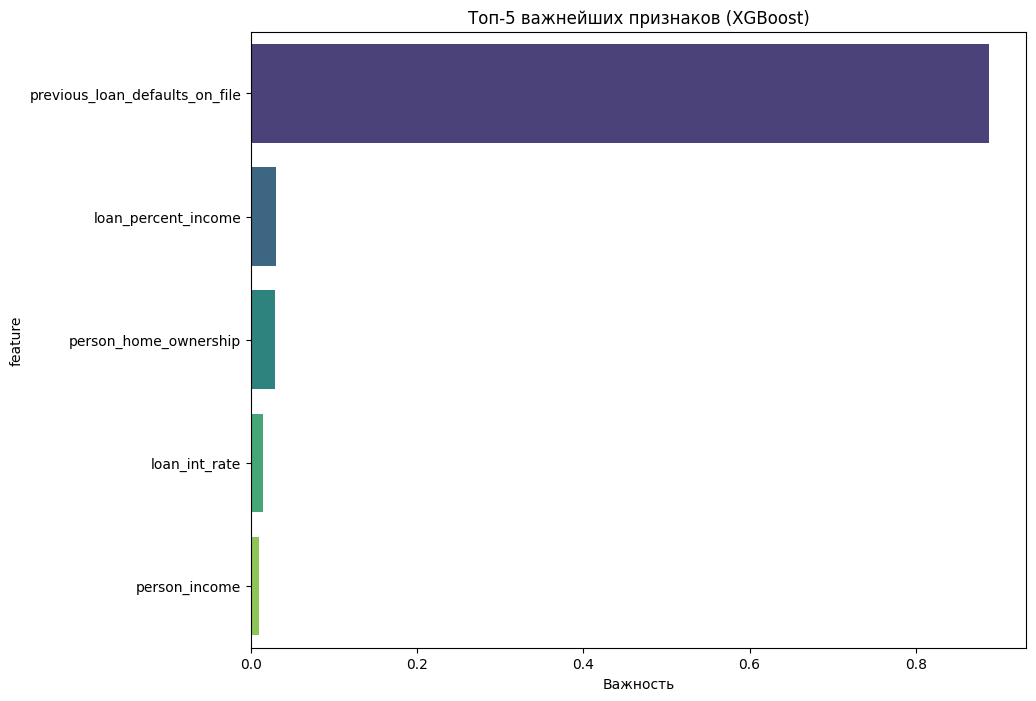

In [ ]:
feature_importances_xgb = best_xgb.feature_importances_
importance_df_xgb = pd.DataFrame({'feature': X_train.columns, 'importance': feature_importances_xgb})
importance_df_xgb = importance_df_xgb.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=importance_df_xgb.head(5), x='importance', y='feature', palette='viridis')
plt.title('Топ-5 важнейших признаков (XGBoost)')
plt.xlabel('Важность')
plt.show()

In [ ]:
start_time = time.time()
y_pred_xgb_final = best_xgb.predict(X_test)
time_xgb_pred = time.time() - start_time

new_row = pd.DataFrame([{
    'Модель': 'XGBoost (оптимизированный)',
    'Accuracy': acc_best_xgb,
    'F1-score (macro)': f1_best_xgb,
    'Время обучения (сек)': refit_time,
    'Время предсказания (сек)': time_xgb_pred
}])
comparison_df = pd.concat([comparison_df, new_row], ignore_index=True)
comparison_df = comparison_df.round(4)

print("Таблица сравнения всех моделей")
print(comparison_df.to_string(index=False))

Таблица сравнения всех моделей
                           Модель  Accuracy  F1-score (macro)  Время обучения (сек)  Время предсказания (сек)
Дерево решений (оптимизированное)    0.9174            0.8721                0.1045                    0.0041
 Случайный лес (оптимизированный)    0.9287            0.8906              619.6409                    0.3042
       XGBoost (оптимизированный)    0.9345            0.9005             1220.8016                    0.1481


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import time

base_models = [
    ('rf', RandomForestClassifier(
        n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=1,
        max_features='sqrt', random_state=42, n_jobs=-1
    )),
    ('xgb', XGBClassifier(
        n_estimators=200, learning_rate=0.1, max_depth=5, subsample=0.8,
        colsample_bytree=1.0, reg_alpha=0, reg_lambda=1,
        random_state=42, n_jobs=-1, use_label_encoder=False, eval_metric='logloss'
    )),
    ('lr', LogisticRegression(
        max_iter=1000, random_state=42, n_jobs=-1
    )),
    ('svm', SVC(
        kernel='linear', probability=True, random_state=42
    ))
]

meta_model = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)

stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1,
    verbose=1
)
start_time = time.time()
stacking_clf.fit(X_train, y_train)
stacking_train_time = time.time() - start_time

start_time = time.time()
y_pred_stacking = stacking_clf.predict(X_test)
stacking_pred_time = time.time() - start_time

acc_stacking = accuracy_score(y_test, y_pred_stacking)
f1_stacking = classification_report(y_test, y_pred_stacking, output_dict=True)['macro avg']['f1-score']

print("=== Стекинг-ансамбль ===")
print(f"Точность (Accuracy): {acc_stacking:.4f}")
print(f"Макро-F1: {f1_stacking:.4f}")
print(f"Время обучения: {stacking_train_time:.4f} сек")
print(f"Время предсказания: {stacking_pred_time:.4f} сек")
print(f"\nОтчет классификации:\n{classification_report(y_test, y_pred_stacking, target_names=['0', '1'])}")


=== Стекинг-ансамбль ===
Точность (Accuracy): 0.9324
Макро-F1: 0.8975
Время обучения: 472.6260 сек
Время предсказания: 2.2183 сек

Отчет классификации:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6812
           1       0.90      0.79      0.84      1942

    accuracy                           0.93      8754
   macro avg       0.92      0.88      0.90      8754
weighted avg       0.93      0.93      0.93      8754



In [ ]:
new_row_stacking = pd.DataFrame([{
    'Модель': 'Стекинг (RF + XGB + LR + SVM)',
    'Accuracy': acc_stacking,
    'F1-score (macro)': f1_stacking,
    'Время обучения (сек)': stacking_train_time,
    'Время предсказания (сек)': stacking_pred_time
}])

comparison_df = pd.concat([comparison_df, new_row_stacking], ignore_index=True)
comparison_df = comparison_df.round(4)

print("Таблица сравнения всех моделей")
print(comparison_df.to_string(index=False))


Таблица сравнения всех моделей
                           Модель  Accuracy  F1-score (macro)  Время обучения (сек)  Время предсказания (сек)
Дерево решений (оптимизированное)    0.9174            0.8721                0.1045                    0.0041
 Случайный лес (оптимизированный)    0.9287            0.8906              619.6409                    0.3042
       XGBoost (оптимизированный)    0.9345            0.9005             1220.8016                    0.1481
    Стекинг (RF + XGB + LR + SVM)    0.9324            0.8975              472.6260                    2.2183
    Стекинг (RF + XGB + LR + SVM)    0.9324            0.8975              472.6260                    2.2183
    Стекинг (RF + XGB + LR + SVM)    0.9324            0.8975              472.6260                    2.2183
    Стекинг (RF + XGB + LR + SVM)    0.9324            0.8975              472.6260                    2.2183


In [ ]:
meta_coefs = stacking_clf.final_estimator_.coef_[0]
model_names = [name for name, _ in base_models]

importance_meta = pd.DataFrame({
    'Базовая модель': model_names,
    'Вес в метамодели': meta_coefs
}).sort_values('Вес в метамодели', ascending=False)

print("=== Вес базовых моделей в метамодели===")
print(importance_meta.to_string(index=False))

=== Вес базовых моделей в метамодели===
Базовая модель  Вес в метамодели
           xgb          5.686526
            rf          2.677562
            lr          0.197510
           svm         -0.223468
